In [2]:
import numpy as np
import matplotlib . pyplot as plt
import random

# Exercise 1


In [3]:
data = np.genfromtxt ('advertising.csv', delimiter =',', skip_header =1)
N = data . shape [0]
X = data [: ,:3]
y = data [: ,3:]

def mean_normalization ( X) :
    """
        * Return data normalized with min max scaled
    """
    N = len( X )
    maxi = np.max ( X )
    mini = np.min ( X )
    avg  = np.mean ( X )
    X = (X - avg ) /( maxi - mini )
    X_b = np . c_ [ np . ones (( N , 1) ) , X ]
    return X_b , maxi , mini , avg

In [4]:
print(data.shape)
data[0]
print(X[0])

(200, 4)
[230.1  37.8  69.2]


In [5]:
X_b , maxi , mini , avg = mean_normalization ( X )
print(X.shape)
X_b[0]

(200, 3)


array([ 1.        ,  0.55042679, -0.09835864,  0.00757928])

# **Stochastic Gradient Descent**
* Apply Vectorization.

* **Input**:(4 inputs) X_b, y, n_epochs, learning_rate
* **Ouput**: thetas_path, losses

In [86]:
thetas = np . asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,[0.29763545]])
print(thetas.shape)

x_sample = X_b[0]
print(x_sample)

random_index =0
xi = X_b [ random_index : random_index +1]
yi = y [ random_index : random_index +1]

# Compute output
y_hat = xi.dot(thetas)
print(X_b.shape)
print(xi.shape)

# Compute loss li
loss = (y_hat - yi) ** 2 / 2
print(loss)

# Compute gradient for loss
print(y_hat.shape)
gradient = xi.T.dot(y_hat - yi)

# update theta
learning_rate = 0.00001
thetas -= learning_rate * gradient

(4, 1)
[ 1.          0.55042679 -0.09835864  0.00757928]
(200, 4)
(1, 4)
[[231.62793401]]
(1, 1)


In [33]:
def stochastic_gradient_descent ( X_b , y , n_epochs =50 , learning_rate =0.00001) :    
    # thetas = np. random . randn (4 , 1) # uncomment this line for real application
    thetas = np . asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,[0.29763545]])

    thetas_path = [ thetas ]
    losses = []

    for epoch in range ( n_epochs ) :
        for i in range ( N ) :
            # select random number in N
            # random_index = np. random . randint (N) #In real application , yo
            random_index = i # This code is used for this assignment only

            xi = X_b [ random_index : random_index +1]
            yi = y [ random_index : random_index +1]

            # Compute output
            y_hat = xi.dot(thetas)

            # Compute loss li
            loss = (y_hat - yi) ** 2 / 2
            losses.append(loss[0][0])
            # Compute gradient for loss
            gradient = xi.T.dot(y_hat - yi)
            
            # update theta
            thetas -= learning_rate * gradient
           
        #print(f"Epoch {epoch + 1}/{n_epochs}, Loss: {np.mean(losses):.4f}")
    return thetas_path , losses

### Plot losses

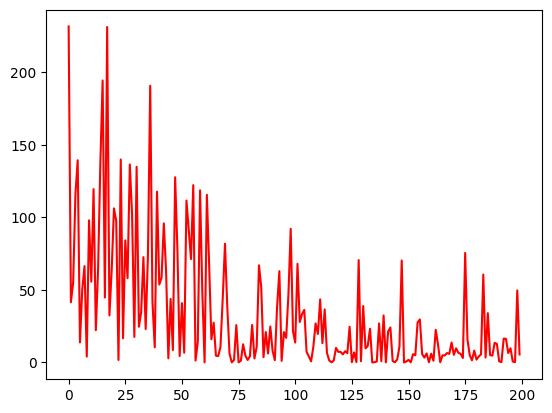

In [43]:
EPOCHS = 1 
sgd_theta , losses = stochastic_gradient_descent(X_b , y , n_epochs = EPOCHS ,learning_rate =0.01 )

total_sample = EPOCHS * 200

x_axis = list(range(total_sample))
plt.plot(x_axis , losses [:total_sample] , color ="r")
plt.show()

### Output losses

In [44]:
np.sum(losses)

6754.643359356192

# **Mini-Batch** 

* Pick m sample for each training

### Experience one-sample

In [45]:
shuffled_indices = np . asarray ([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 ,
132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 ,
165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 ,
169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 ,
77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 ,
195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 ,
92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 ,
174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 ,
129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 ,
168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 ,
133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 ,
154])

thetas = np . asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,
    [0.29763545]])

X_b_shuffled = X_b [ shuffled_indices ]
y_shuffled = y [ shuffled_indices ]

minibatch_size = 20
i = 20 
xi = X_b_shuffled [ i : i + minibatch_size ]
yi = y_shuffled [ i: i + minibatch_size ]

#### Loss calculation

In [54]:
y_hat = xi.dot(thetas)
y_hat.shape 
loss = (y_hat - yi)**2 /2
loss_mean =  loss / minibatch_size
print(np.sum(loss_mean))

101.23449641705771


### Direvative of loss

In [61]:
print(y_hat.shape)
print(yi.shape)
(y_hat - yi).shape
print(xi.shape)

(20, 1)
(20, 1)
(20, 4)


In [64]:
gradient = xi.T.dot(y_hat - yi)
print(gradient / minibatch_size)

[[-13.23771792]
 [ -3.90451166]
 [  1.95730169]
 [  1.93583512]]


### Update Parameter

In [65]:
learning_rate = 0.0001
thetas -= learning_rate * gradient

thetas

array([[ 1.24213468],
       [-0.79617782],
       [ 1.38326652],
       [ 0.28602044]])

### **Build-in**

In [77]:
def mini_batch_gradient_descent ( X_b , y , n_epochs =50 , minibatch_size = 20 , learning_rate =0.01) :

    # thetas = np. random . randn (4 , 1)
    thetas = np . asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,
    [0.29763545]])

    thetas_path = [ thetas ]
    losses = []

    for epoch in range ( n_epochs ) :

        shuffled_indices = np . asarray ([21 , 144 , 17 , 107 , 37 , 115 , 167 , 31 , 3 ,
        132 , 179 , 155 , 36 , 191 , 182 , 170 , 27 , 35 , 162 , 25 , 28 , 73 , 172 , 152 , 102 , 16 ,
        185 , 11 , 1 , 34 , 177 , 29 , 96 , 22 , 76 , 196 , 6 , 128 , 114 , 117 , 111 , 43 , 57 , 126 ,
        165 , 78 , 151 , 104 , 110 , 53 , 181 , 113 , 173 , 75 , 23 , 161 , 85 , 94 , 18 , 148 , 190 ,
        169 , 149 , 79 , 138 , 20 , 108 , 137 , 93 , 192 , 198 , 153 , 4 , 45 , 164 , 26 , 8 , 131 ,
        77 , 80 , 130 , 127 , 125 , 61 , 10 , 175 , 143 , 87 , 33 , 50 , 54 , 97 , 9 , 84 , 188 , 139 ,
        195 , 72 , 64 , 194 , 44 , 109 , 112 , 60 , 86 , 90 , 140 , 171 , 59 , 199 , 105 , 41 , 147 ,
        92 , 52 , 124 , 71 , 197 , 163 , 98 , 189 , 103 , 51 , 39 , 180 , 74 , 145 , 118 , 38 , 47 ,
        174 , 100 , 184 , 183 , 160 , 69 , 91 , 82 , 42 , 89 , 81 , 186 , 136 , 63 , 157 , 46 , 67 ,
        129 , 120 , 116 , 32 , 19 , 187 , 70 , 141 , 146 , 15 , 58 , 119 , 12 , 95 , 0 , 40 , 83 , 24 ,
        168 , 150 , 178 , 49 , 159 , 7 , 193 , 48 , 30 , 14 , 121 , 5 , 142 , 65 , 176 , 101 , 55 ,
        133 , 13 , 106 , 66 , 99 , 68 , 135 , 158 , 88 , 62 , 166 , 156 , 2 , 134 , 56 , 123 , 122 ,
        154])

        X_b_shuffled = X_b [ shuffled_indices ]
        y_shuffled = y [ shuffled_indices ]

        for i in range (0 , N , minibatch_size ):
            xi = X_b_shuffled [ i : i + minibatch_size ]
            yi = y_shuffled [ i: i + minibatch_size ]

            # compute output
            y_hat = xi.dot(thetas)
            # compute loss
            loss = (y_hat-yi)**2 /2 
            # compute derivative of loss
            gradients = xi.T.dot(y_hat - yi)
            gradients = gradients / minibatch_size
            # compute derivative of parameters

            # update parameters
            thetas = thetas - learning_rate * gradients
            thetas_path.append(thetas )

            loss_mean = np.sum(loss)/minibatch_size
            losses.append(loss_mean)

    return thetas_path , losses

### Ouput 

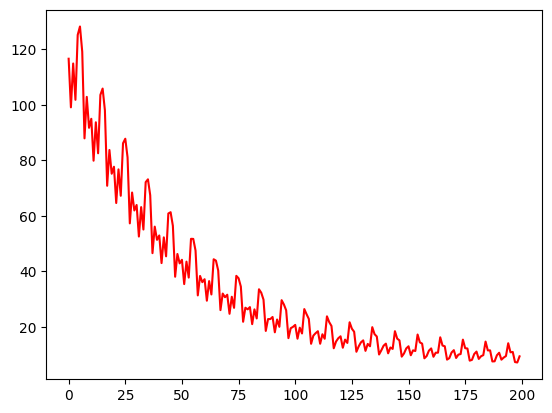

In [79]:
mbgd_thetas , losses = mini_batch_gradient_descent (X_b, y, n_epochs = 50, minibatch_size = 20, learning_rate = 0.01)

x_axis = list(range(200))
plt.plot(x_axis,losses [:200] , color ="r")
plt.show()

### Losses

In [80]:
mbgd_thetas , losses = mini_batch_gradient_descent (X_b ,y ,n_epochs =50,minibatch_size = 20 ,learning_rate =0.01)
print(round(sum(losses),2))

8865.65


In [83]:
len(losses)

500

# **Batch Gradient Descent**

In [84]:
def batch_gradient_descent ( X_b , y , n_epochs =100 , learning_rate =0.01) :

    # thetas = np. random . randn (4 , 1) # uncomment this line for real application
    thetas = np . asarray ([[1.16270837] , [ -0.81960489] , [1.39501033] ,
    [0.29763545]])

    thetas_path = [ thetas ]
    losses = []

    N = len(X_b)

    for i in range (n_epochs) :
        # compute output
        y_hat = X_b.dot(thetas)

        # Compute loss
        loss = (y_hat  - y) **2 / 2 

        # Compute losss ’s derivative
        gradients = X_b.T.dot(y_hat-y)
        gradients = gradients / N 
        # computer parameters ’ derivative

        # Update parameters
        thetas = thetas - learning_rate * gradients
        thetas_path.append(thetas )

        mean_loss = np.sum(loss) / N
        losses.append(mean_loss )

    return thetas_path , losses

### Plot

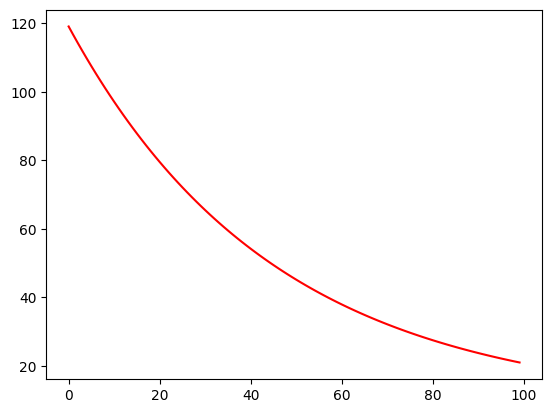

In [85]:
bgd_thetas , losses = batch_gradient_descent (X_b, y, n_epochs =100, learning_rate=0.01)

x_axis = list(range (100) )
plt.plot(x_axis, losses [:100], color ="r")
plt.show()

### Losses